In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from category_encoders import TargetEncoder

# Lista com os nomes dos datasets e classificadores
datasets = ["dataset.xlsx", "dataset2.xlsx"]
classifiers = [RandomForestClassifier(), SVC()]

# Lista com as proporções dos test_sizes
test_sizes = [0.2, 0.5, 0.8]

# Número de execuções
num_executions = 30

# Dicionário com os codificadores "TargetEncoder" para 'name' e 'affiliations'
encoders = {
    'name': TargetEncoder(),
    'affiliation': TargetEncoder()
}

# DataFrame para armazenar os resultados individuais
results_individual_df = pd.DataFrame(columns=["Classifier", "Dataset", "Test_size", "Precision", "Recall", "F1"])

# Loop para realizar as execuções e calcular as métricas
for dataset in datasets:
    author_data = pd.read_excel(dataset)

    for classifier in classifiers:
        for test_size in test_sizes:
            for _ in range(num_executions):
                # Dividir os dados em features (x) e rótulos (y)
                x = author_data.drop(['label'], axis=1)
                y = author_data['label']

                # Dividir os dados em treinamento e teste
                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

                # Ajustar os codificadores aos dados de treinamento e transformar os dados de treinamento e teste
                for col, encoder in encoders.items():
                    X_train[col] = encoder.fit_transform(X_train[col], y_train)
                    X_test[col] = encoder.transform(X_test[col])

                # Treinar o classificador
                classifier.fit(X_train, y_train)

                # Realizar a classificação dos dados de teste
                predictions = classifier.predict(X_test)

                # Avaliar o desempenho do modelo e adicionar os resultados ao dataframe de resultados individuais
                report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
                precision = report['weighted avg']['precision']
                recall = report['weighted avg']['recall']
                f1 = report['weighted avg']['f1-score']
                
                results_individual_df = pd.concat([results_individual_df, pd.DataFrame({"Classifier": [str(classifier)],
                                                                                        "Dataset": [dataset],
                                                                                        "Test_size": [test_size],
                                                                                        "Precision": [precision],
                                                                                        "Recall": [recall],
                                                                                        "F1": [f1]})], ignore_index=True)

In [14]:
# Mostrar o dataframe com os resultados individuais
results_individual_df

,Classifier,Dataset,Test_size,Precision,Recall,F1
0,RandomForestClassifier(),dataset.xlsx,0.2,0.653333,0.800,0.715556
1,RandomForestClassifier(),dataset.xlsx,0.2,0.650000,0.700,0.666667
2,RandomForestClassifier(),dataset.xlsx,0.2,0.933333,0.900,0.893333
3,RandomForestClassifier(),dataset.xlsx,0.2,0.875000,0.800,0.797143
4,RandomForestClassifier(),dataset.xlsx,0.2,0.883333,0.800,0.800000
...,...,...,...,...,...,...
355,SVC(),dataset2.xlsx,0.8,0.087121,0.250,0.129167
356,SVC(),dataset2.xlsx,0.8,0.306667,0.300,0.272078
357,SVC(),dataset2.xlsx,0.8,0.165104,0.400,0.232381
358,SVC(),dataset2.xlsx,0.8,0.160101,0.400,0.228645


In [15]:
results_individual_df.to_excel("experimento.xlsx")

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})

In [17]:
df = pd.read_excel('experimento.xlsx')

<Axes: xlabel='Classifier', ylabel='Precision'>

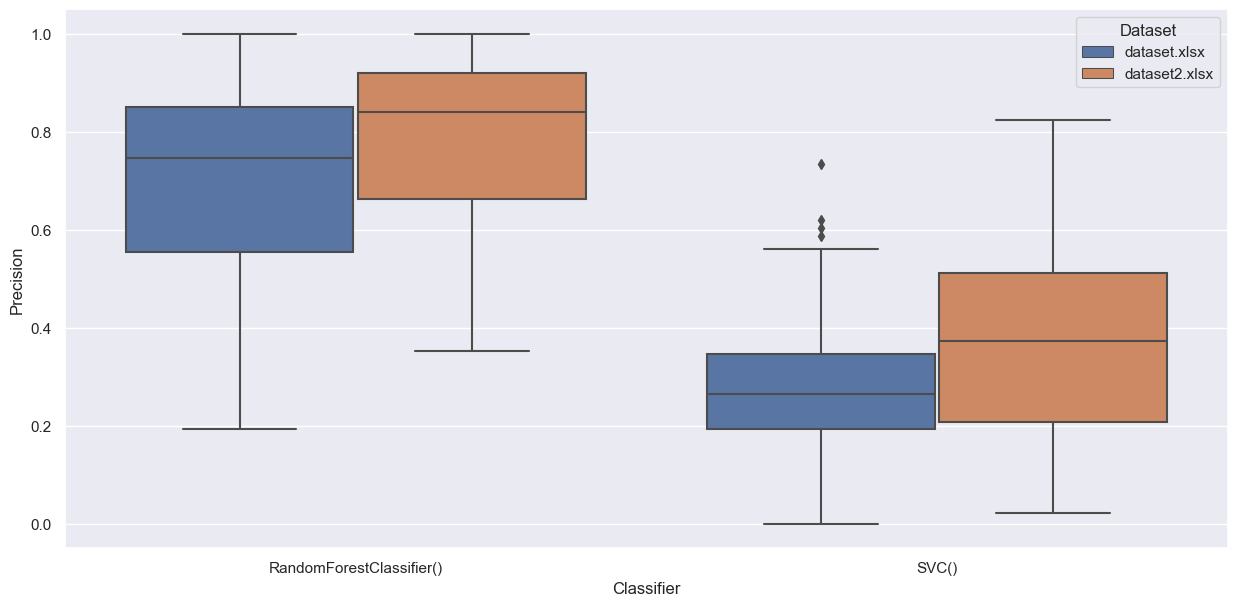

In [18]:
df.head()
sns.boxplot(data=df, x="Classifier" , y="Precision", hue="Dataset")

<Axes: xlabel='Classifier', ylabel='Recall'>

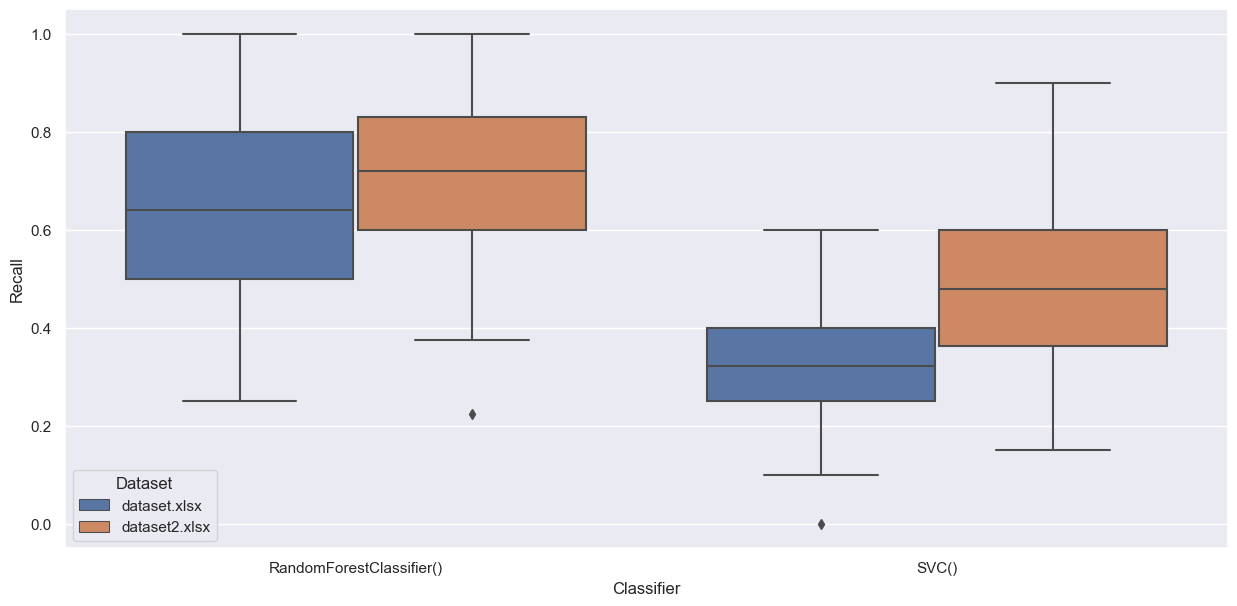

In [19]:
sns.boxplot(data=df, x="Classifier" , y="Recall", hue="Dataset")

<Axes: xlabel='Classifier', ylabel='F1'>

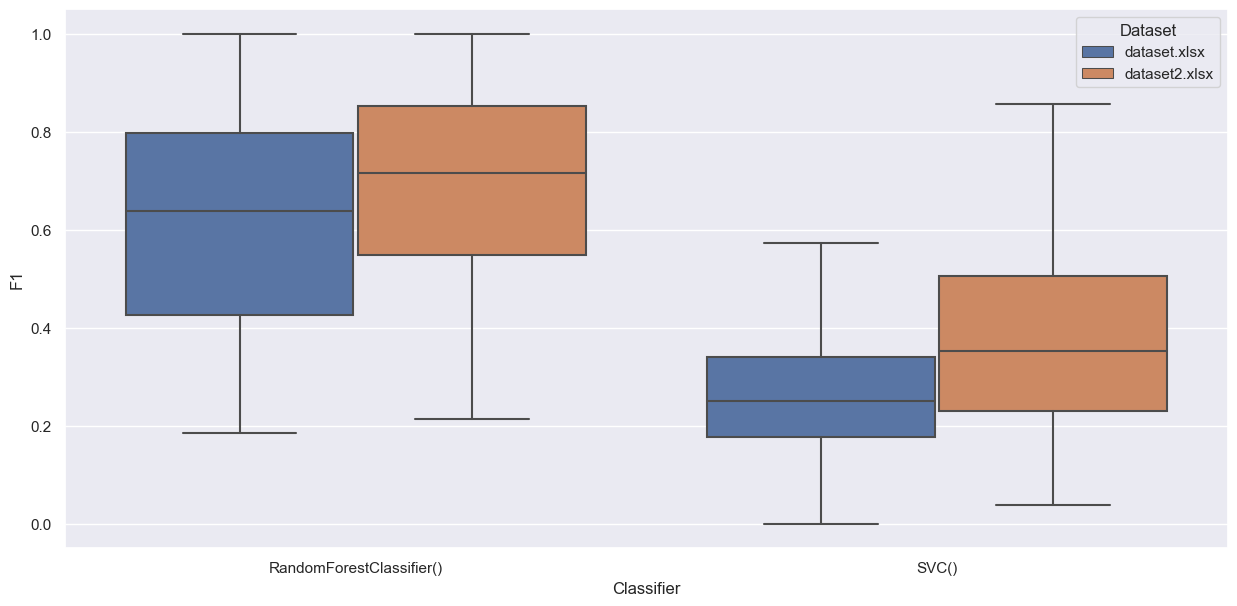

In [25]:
sns.boxplot(data=df, x="Classifier" , y="F1", hue="Dataset")

<Axes: xlabel='Classifier', ylabel='Precision'>

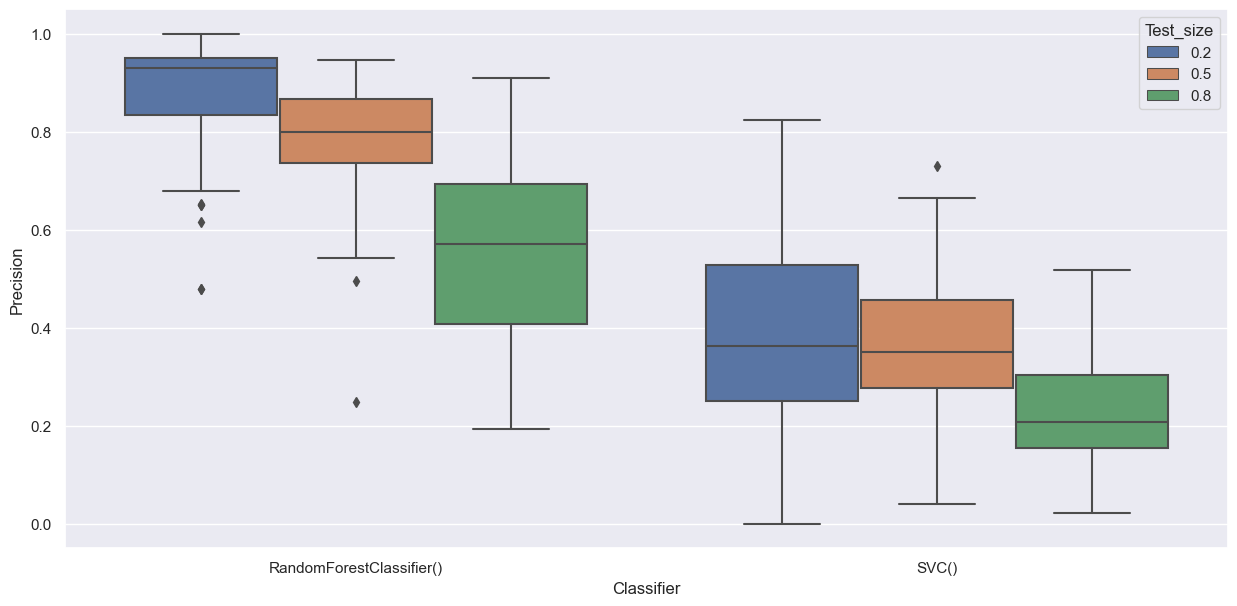

In [23]:
sns.boxplot(data=df, x="Classifier" , y="Precision", hue="Test_size")

<Axes: xlabel='Classifier', ylabel='Recall'>

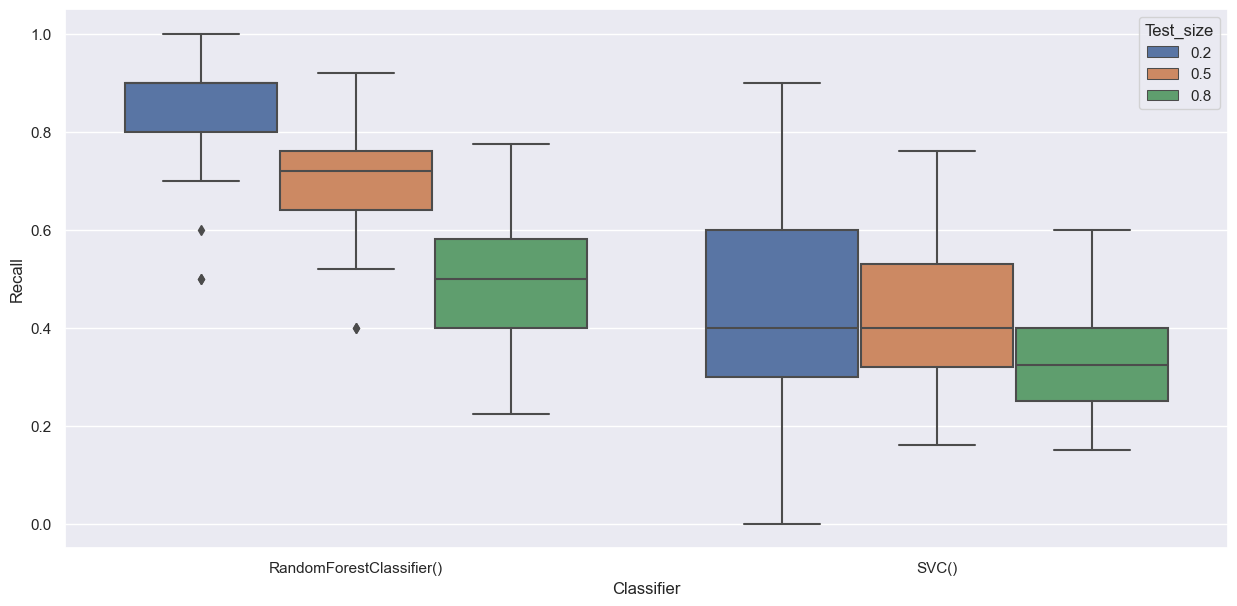

In [24]:
sns.boxplot(data=df, x="Classifier" , y="Recall", hue="Test_size")

<Axes: xlabel='Classifier', ylabel='F1'>

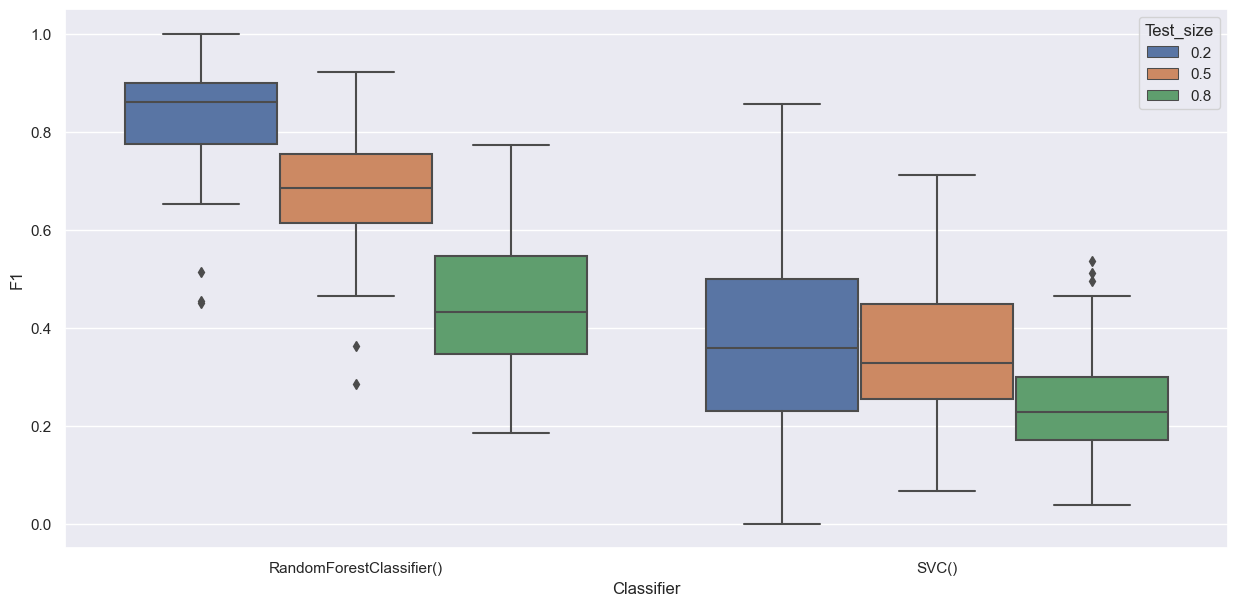

In [26]:
sns.boxplot(data=df, x="Classifier" , y="F1", hue="Test_size")